<a href="https://colab.research.google.com/github/nehaal10/fish-bread-prediction/blob/main/Fish_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import tensorflow as tf
import shutil
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import ResNet152V2
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image
from array import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!nvidia-smi

Sat Jan  8 09:30:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Downloading The Dataset from Kaggle**

In [ ]:
os.chdir('/content/drive/MyDrive/kaggle')

path=os.getcwd()

os.environ['KAGGLE_CONFIG_DIR']=path

!kaggle datasets download -d crowww/a-large-scale-fish-dataset

100% 3.24G/3.24G [00:54<00:00, 30.5MB/s]
100% 3.24G/3.24G [00:54<00:00, 64.4MB/s]


In [ ]:
os.mkdir('/content/drive/MyDrive/Dataset/Project/fish_images')
shutil.move('/content/drive/MyDrive/kaggle/a-large-scale-fish-dataset.zip','/content/drive/MyDrive/Dataset/Project/fish_images')

'/content/drive/MyDrive/Dataset/Project/fish_images/a-large-scale-fish-dataset.zip'

In [ ]:
os.chdir('/content/drive/MyDrive/Dataset/Project/fish_images')

!unzip -q 'a-large-scale-fish-dataset.zip'

In [ ]:
shutil.rmtree('/content/drive/MyDrive/Dataset/Project/fish_images/Fish_Dataset')

In [ ]:
for i in os.listdir():
  if os.path.isfile(i):
    os.remove(i)

In [ ]:
os.chdir('/content/drive/MyDrive/Dataset/Project/fish_images/NA_Fish_Dataset')
for i in os.listdir():
  shutil.move(i,'/content/drive/MyDrive/Dataset/Project/fish_images')

# **Resizing the images**

In [ ]:
os.chdir('/content/drive/MyDrive/Dataset/Project/fish_images')
for i in os.listdir():
  os.chdir('/content/drive/MyDrive/Dataset/Project/fish_images/'+str(i))
  for i in os.listdir():
    image=cv2.imread(i)
    resized_image= cv2.resize(image, (240,240), interpolation=cv2.INTER_AREA)
    os.remove(i)
    cv2.imwrite(i,resized_image)

# **Visualizing the images**

name->  Black Sea Sprat 



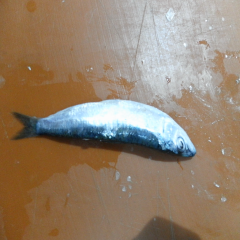

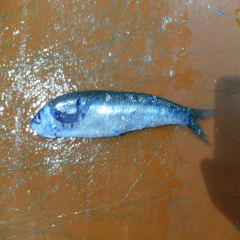

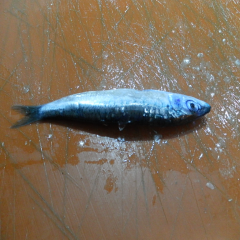

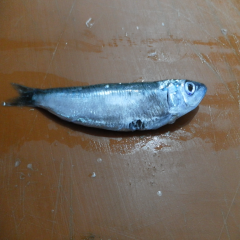

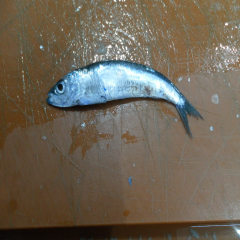

name->  Gilt Head Bream 



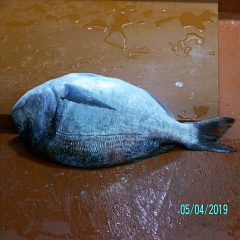

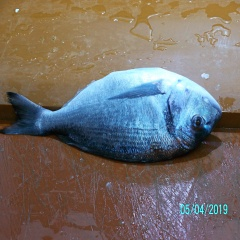

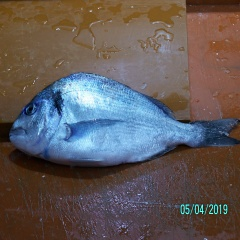

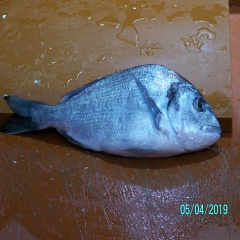

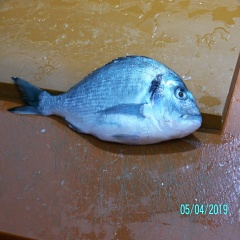

name->  Horse Mackerel 



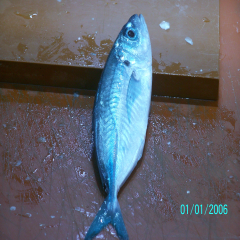

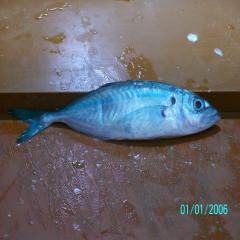

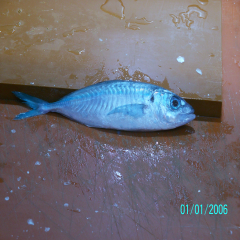

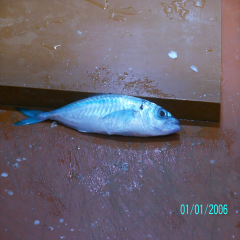

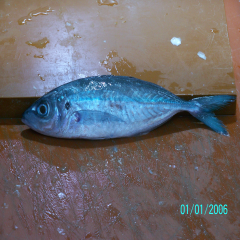

name->  Red Mullet 



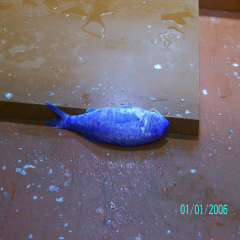

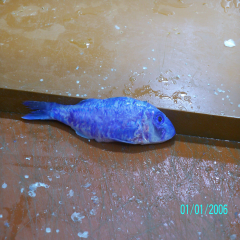

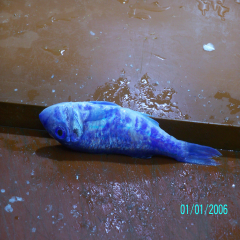

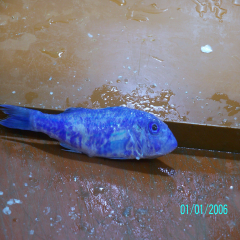

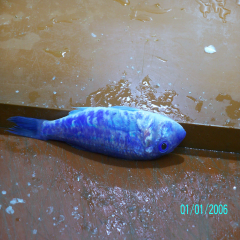

name->  Red Sea Bream 



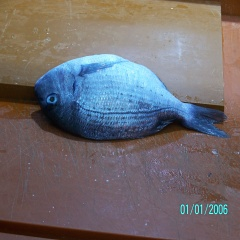

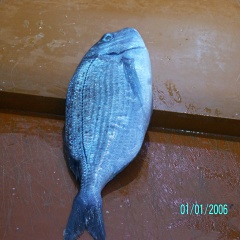

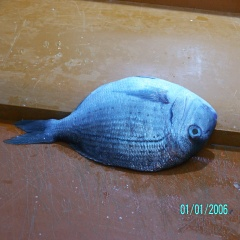

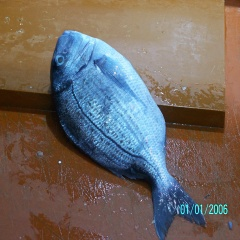

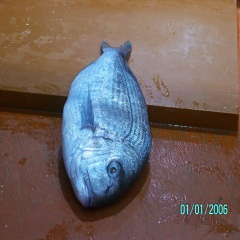

name->  Sea Bass 



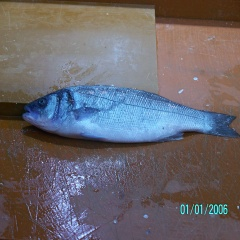

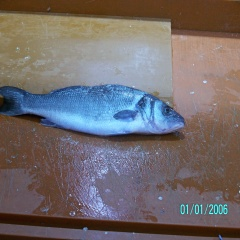

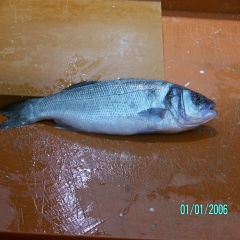

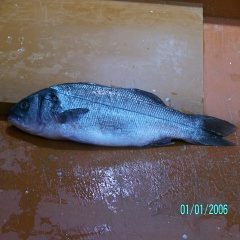

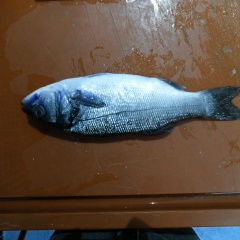

name->  Shrimp 



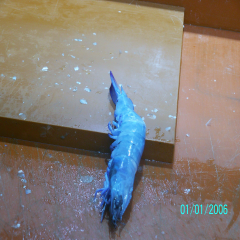

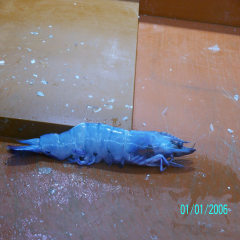

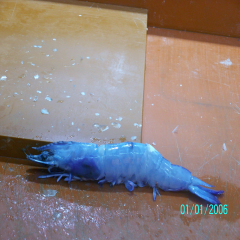

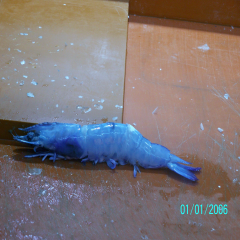

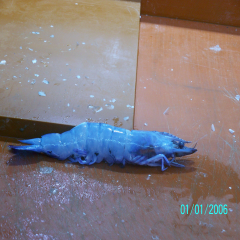

name->  Striped Red Mullet 



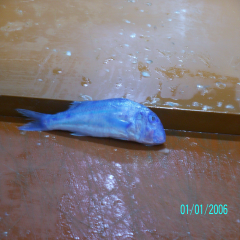

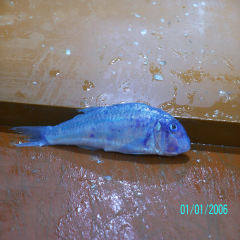

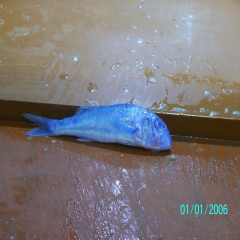

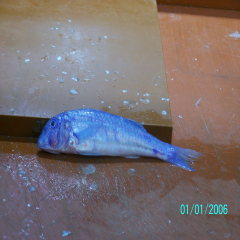

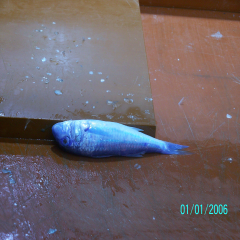

name->  Trout 



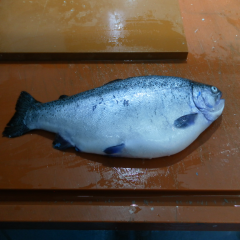

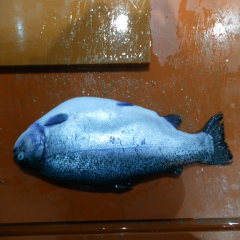

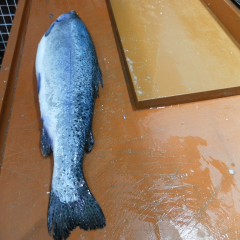

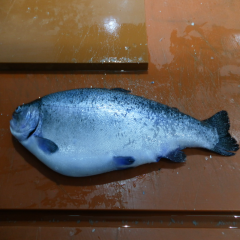

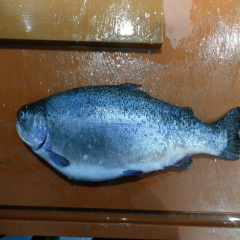

In [ ]:
os.chdir('/content/drive/MyDrive/Dataset/Project/fish_images')
path=os.getcwd()
for i in os.listdir():
  if '.ipyn' in i:
    break
  print('name-> ',i,'\n')
  os.chdir('/content/drive/MyDrive/Dataset/Project/fish_images/'+str(i))
  for j in os.listdir()[:5]:
      img=cv2.imread(j)
      img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      cv2_imshow(img)
      k=k+1


# **preprocessing**


In [4]:
path='/content/drive/MyDrive/Dataset/Project/fish_images'
os.chdir(path)
length={}
for i in os.listdir():
  if '.ipy' in i:
    break
  k=0
  os.chdir(path+'/'+i)
  for j in os.listdir():
    k=k+1
  length[i]=k

In [5]:
length

{'Black Sea Sprat': 50,
 'Gilt Head Bream': 50,
 'Horse Mackerel': 50,
 'Red Mullet': 50,
 'Red Sea Bream': 50,
 'Sea Bass': 50,
 'Shrimp': 50,
 'Striped Red Mullet': 50,
 'Trout': 51}

In [ ]:
diff=20

datagen= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0.2,
                                                         width_shift_range=0.2,
                                                         shear_range=0.2,
                                                         horizontal_flip=0.2,
            )

data=[]
os.chdir('/content/drive/MyDrive/Dataset/Project/fish_images/Trout')
for i in os.listdir()[:20]:
  img=cv2.imread(i)
  img=tf.keras.preprocessing.image.img_to_array(img)
  data.append(img)

data=np.array(data)
i=0

for b in datagen.flow(data,
                      batch_size=1,
                      save_to_dir='/content/drive/MyDrive/Dataset/Project/fish_images/Trout',
                      save_prefix='aug',
                      save_format='png'):
  if i==diff:
    break
  else:
    i=i+1

# **Converting jpg to png**

In [ ]:
os.chdir('/content/drive/MyDrive/Dataset/Project/fish_images')
for i in os.listdir():
  os.chdir('/content/drive/MyDrive/Dataset/Project/fish_images/'+i)
  for j in os.listdir():
    if '.ip' in j:
      break
    if '.png' not in j:
      img=Image.open(j)
      os.remove(j)
      img.save(j.split('.')[0]+'.png')

# **Creating CSV tables**

In [6]:
os.chdir('/content/drive/MyDrive/Dataset/Project/fish_images')
features=[]
targets=[]
p='/content/drive/MyDrive/Dataset/Project/fish_images'
for i in os.listdir():
  new_p=p+'/'+i
  k=0
  os.chdir('/content/drive/MyDrive/Dataset/Project/fish_images/'+i)
  for j in os.listdir():
    if '.ipy' not in j:
      features.append(new_p+'/'+j)
      targets.append(i)

In [7]:
path={'Features':features,'Target':targets}

data=pd.DataFrame(path)

data

Features           Target
0    /content/drive/MyDrive/Dataset/Project/fish_im...  Black Sea Sprat
1    /content/drive/MyDrive/Dataset/Project/fish_im...  Black Sea Sprat
2    /content/drive/MyDrive/Dataset/Project/fish_im...  Black Sea Sprat
3    /content/drive/MyDrive/Dataset/Project/fish_im...  Black Sea Sprat
4    /content/drive/MyDrive/Dataset/Project/fish_im...  Black Sea Sprat
..                                                 ...              ...
445  /content/drive/MyDrive/Dataset/Project/fish_im...            Trout
446  /content/drive/MyDrive/Dataset/Project/fish_im...            Trout
447  /content/drive/MyDrive/Dataset/Project/fish_im...            Trout
448  /content/drive/MyDrive/Dataset/Project/fish_im...            Trout
449  /content/drive/MyDrive/Dataset/Project/fish_im...            Trout

[450 rows x 2 columns]

In [8]:
data=data.sample(frac=1)

In [9]:
data.reset_index(inplace=True)

In [10]:
data.drop('index',axis=1,inplace=True)

In [11]:
data

Features              Target
0    /content/drive/MyDrive/Dataset/Project/fish_im...            Sea Bass
1    /content/drive/MyDrive/Dataset/Project/fish_im...      Horse Mackerel
2    /content/drive/MyDrive/Dataset/Project/fish_im...              Shrimp
3    /content/drive/MyDrive/Dataset/Project/fish_im...               Trout
4    /content/drive/MyDrive/Dataset/Project/fish_im...       Red Sea Bream
..                                                 ...                 ...
445  /content/drive/MyDrive/Dataset/Project/fish_im...  Striped Red Mullet
446  /content/drive/MyDrive/Dataset/Project/fish_im...       Red Sea Bream
447  /content/drive/MyDrive/Dataset/Project/fish_im...      Horse Mackerel
448  /content/drive/MyDrive/Dataset/Project/fish_im...      Horse Mackerel
449  /content/drive/MyDrive/Dataset/Project/fish_im...          Red Mullet

[450 rows x 2 columns]

# **splitting the data**

In [12]:
x_train_df,x_test_df=train_test_split(data,test_size=0.2,shuffle=True,random_state=42)

In [13]:
x_train_df

Features              Target
24   /content/drive/MyDrive/Dataset/Project/fish_im...               Trout
17   /content/drive/MyDrive/Dataset/Project/fish_im...     Gilt Head Bream
66   /content/drive/MyDrive/Dataset/Project/fish_im...     Gilt Head Bream
148  /content/drive/MyDrive/Dataset/Project/fish_im...      Horse Mackerel
249  /content/drive/MyDrive/Dataset/Project/fish_im...  Striped Red Mullet
..                                                 ...                 ...
106  /content/drive/MyDrive/Dataset/Project/fish_im...     Black Sea Sprat
270  /content/drive/MyDrive/Dataset/Project/fish_im...  Striped Red Mullet
348  /content/drive/MyDrive/Dataset/Project/fish_im...               Trout
435  /content/drive/MyDrive/Dataset/Project/fish_im...              Shrimp
102  /content/drive/MyDrive/Dataset/Project/fish_im...              Shrimp

[360 rows x 2 columns]

# **preapring for tensorflow compatibility**

In [14]:
train_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255,
                                                          rotation_range=30,
                                                          width_shift_range=0.3,
                                                          height_shift_range=0.3,
                                                          shear_range=0.2,
                                                          validation_split=0.2,
                                                          vertical_flip=True)


test_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

train_data=train_gen.flow_from_dataframe(x_train_df,
                                         x_col='Features',
                                         y_col='Target',
                                         target_size=(240,240),
                                         batch_size=8,
                                         color_mode='rgb',
                                         class_mode='categorical',
                                         shuffle=True,
                                         subset='training')


val_data=train_gen.flow_from_dataframe(  x_train_df,
                                        x_col='Features',
                                        y_col='Target',
                                        target_size=(240,240),
                                        batch_size=2,
                                        color_mode='rgb',
                                        class_mode='categorical',
                                        shuffle=True,
                                        subset='validation')

test_data=test_gen.flow_from_dataframe(x_test_df,
                                       x_col='Features',
                                       y_col='Target',
                                       target_size=(240,240),
                                       batch_size=8,
                                       color_mode='rgb',
                                       class_mode='categorical',
                                       shuffle=False)

Found 288 validated image filenames belonging to 9 classes.
Found 72 validated image filenames belonging to 9 classes.
Found 90 validated image filenames belonging to 9 classes.


# **Building the neural networks**

**Transfer Learning**

In [38]:
Inputs=(240,240,3)
def model_building():
  efficient_base_model=ResNet152V2(include_top=False,
                                    weights='imagenet',
                                    input_shape=Inputs)

  efficient_base_model.trainable=False


  input=tf.keras.Input(shape=Inputs)
  x=efficient_base_model(input,training=False)
  x=tf.keras.layers.Flatten()(x)
  x=tf.keras.layers.Dropout(0.2) (x)
  x=tf.keras.layers.BatchNormalization()(x)
  output=tf.keras.layers.Dense(9,activation='softmax')(x)
  model=tf.keras.Model(input,output)

  opt=tf.keras.optimizers.Adam(0.00001)
  los=tf.keras.losses.categorical_crossentropy
  metric=tf.keras.metrics.categorical_accuracy


  model.compile(optimizer=opt,loss=los,metrics=[metric])


  return model







In [39]:
model=model_building()

In [40]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 8, 8, 2048)        58331648  
                                                                 
 flatten_3 (Flatten)         (None, 131072)            0         
                                                                 
 dropout_3 (Dropout)         (None, 131072)            0         
                                                                 
 batch_normalization_3 (Batc  (None, 131072)           524288    
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 9)                 1179657   
                                                           

In [41]:
for layer_num,layer_name in enumerate(model.layers[1].layers):
  print(layer_num,'-->',layer_name)

0 --> <keras.engine.input_layer.InputLayer object at 0x7fbeb6ff2d90>
1 --> <keras.layers.convolutional.ZeroPadding2D object at 0x7fbeb66e0410>
2 --> <keras.layers.convolutional.Conv2D object at 0x7fbeb66e0650>
3 --> <keras.layers.convolutional.ZeroPadding2D object at 0x7fbeb66f83d0>
4 --> <keras.layers.pooling.MaxPooling2D object at 0x7fbeb66f17d0>
5 --> <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbeb66d5790>
6 --> <keras.layers.core.activation.Activation object at 0x7fbeb66f8190>
7 --> <keras.layers.convolutional.Conv2D object at 0x7fbeb66db0d0>
8 --> <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbeb5341f90>
9 --> <keras.layers.core.activation.Activation object at 0x7fbeb66d5ed0>
10 --> <keras.layers.convolutional.ZeroPadding2D object at 0x7fbeb6704d90>
11 --> <keras.layers.convolutional.Conv2D object at 0x7fbeb6704890>
12 --> <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbeb66fb

# **So the model is compiles and now we need to train the model!!!!**

In [42]:
class callbackss(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('val_categorical_accuracy')>=0.97:
      print('accuracy reached stopping training')
      self.model.stop_training=True

call=callbackss()

effiecient_net_history=model.fit(
    train_data,
    epochs=50,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=[call]
)

Epoch 1/50
36/36 [==============================] - 27s 443ms/step - loss: 2.3142 - categorical_accuracy: 0.1389 - val_loss: 2.0535 - val_categorical_accuracy: 0.2889
Epoch 2/50
36/36 [==============================] - 13s 360ms/step - loss: 2.1460 - categorical_accuracy: 0.2014 - val_loss: 1.6519 - val_categorical_accuracy: 0.4111
Epoch 3/50
36/36 [==============================] - 13s 360ms/step - loss: 1.9260 - categorical_accuracy: 0.2986 - val_loss: 1.4296 - val_categorical_accuracy: 0.5222
Epoch 4/50
36/36 [==============================] - 13s 360ms/step - loss: 1.8022 - categorical_accuracy: 0.3333 - val_loss: 1.2694 - val_categorical_accuracy: 0.5444
Epoch 5/50
36/36 [==============================] - 13s 360ms/step - loss: 1.6651 - categorical_accuracy: 0.4097 - val_loss: 1.1297 - val_categorical_accuracy: 0.6111
Epoch 6/50
36/36 [==============================] - 13s 360ms/step - loss: 1.4902 - categorical_accuracy: 0.4792 - val_loss: 1.0063 - val_categorical_accuracy: 0.677

In [43]:
model.evaluate(val_data)

36/36 [==============================] - 5s 126ms/step - loss: 0.4976 - categorical_accuracy: 0.8333


[0.49757248163223267, 0.8333333134651184]

In [44]:
pred=model.predict(test_data)